lstm5

과정 요약:<br> 
feature: season, day of week, week number, sales <br> 
feature engineering: outlier delete

결과요약: RMSE: 0.24234837293624878 

상세과정:
주중(1)/주말(2) + 겨울(1)봄(2)여름(3)가을(4) // 


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime   

set seednumber(7 or 77)

In [2]:
tf.set_random_seed(77)

# 1. DATA 준비

In [3]:
columns=['date','sales']

txs=pd.read_table('./lstmData/lstmPrac2.csv', sep=',',header=None,names=columns )
txs.info()
txs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
date     397 non-null object
sales    397 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


,date,sales
0,2016-01-01,34
1,2016-01-02,41
2,2016-01-03,54
3,2016-01-04,41
4,2016-01-05,35


In [4]:
sales=list(txs['sales'])

## 1.1 기본 feature

'ds-y'의 ds로부터 api로 얻을 수 있는 값

year, day of week, month, week number를 기본 feature로 설정

In [5]:
year = lambda x: datetime.strptime(x, "%Y-%m-%d" ).year  
day_of_week = lambda x: datetime.strptime(x, "%Y-%m-%d" ).weekday()
month = lambda x: datetime.strptime(x, "%Y-%m-%d" ).month
# please read docs on how week numbers are calculate
week_number = lambda x: datetime.strptime(x, "%Y-%m-%d" ).strftime('%V')

In [6]:
txs['year'] = txs['date'].map(year)
txs['month']=txs['date'].map(month)
txs['week_number']=txs['date'].map(week_number)
txs['day_of_week']=txs['date'].map(day_of_week)

## 1.2 추가 feature

'ds-y'의 ds로부터 api로 얻을 수 없는 값: 본 feature를 가공한 feature + ds와 무관한 feature

In [7]:
seasons = [0,0,1,1,1,2,2,2,3,3,3,0] #dec - feb is winter, then spring, summer, fall etc
season = lambda x: seasons[(datetime.strptime(x, "%Y-%m-%d" ).month-1)]

In [8]:
day_of_week01s=[0,0,0,0,0,1,1]
day_of_week01= lambda x: day_of_week01s[(datetime.strptime(x, "%Y-%m-%d" ).weekday())]

In [9]:
txs['season']=txs['date'].map(season)
txs['day_of_week01']=txs['date'].map(day_of_week01)
txs

,date,sales,year,month,week_number,day_of_week,season,day_of_week01
0,2016-01-01,34,2016,1,53,4,0,0
1,2016-01-02,41,2016,1,53,5,0,1
2,2016-01-03,54,2016,1,53,6,0,1
3,2016-01-04,41,2016,1,01,0,0,0
4,2016-01-05,35,2016,1,01,1,0,0
5,2016-01-06,44,2016,1,01,2,0,0
6,2016-01-07,50,2016,1,01,3,0,0
7,2016-01-08,42,2016,1,01,4,0,0
8,2016-01-09,42,2016,1,01,5,0,1
9,2016-01-10,66,2016,1,01,6,0,1


pandas를 통해 구한 각 feature는 list()로 우리의 기준type인 list로 변경이 가능

## 1.3 합친 후 normalize하여 최종 data 생성: XY

In [10]:
tempxy=[list(txs['season']),list(txs['day_of_week01']),list(txs['week_number']),sales]

In [11]:
XY=np.array(tempxy).transpose().astype(np.float)

In [12]:
XY

array([[  0.,   0.,  53.,  34.],
       [  0.,   1.,  53.,  41.],
       [  0.,   1.,  53.,  54.],
       ..., 
       [  0.,   1.,   4.,   0.],
       [  0.,   0.,   5.,   5.],
       [  0.,   0.,   5.,  31.]])

## 1.3 추가 가공

### 1.3.1 y의 추가 가공

마지막rmse를 계산할 때 원본 데이터를 복원하기 위해 저장해놓음

In [13]:
originalSales=sales

이상점 제거, bucketization 을 하여 새로운 열을 생성하는 방향으로

#### 이상점 제거

이상점 제거를 위해 평균과 표준편차를 구한다. 이상점의 기준은 일단 평균+-2*sd로 설정

In [14]:
mean=np.mean(sales)
std=np.std(sales)
for i in range(len(sales)):
    if (sales[i]<mean-2*std or sales[i]>mean+2*std):
         sales[i]=int(mean)

### 1.3.2 x의 추가 가공

## 1.4 합친 후 normalize하여 최종 data 생성: XY

In [15]:
tempxy=[list(txs['season']),list(txs['day_of_week']),list(txs['week_number']),sales]

In [16]:
xy=np.array(tempxy).transpose().astype(np.float)

In [17]:
xy

array([[  0.,   4.,  53.,  34.],
       [  0.,   5.,  53.,  41.],
       [  0.,   6.,  53.,  54.],
       ..., 
       [  0.,   6.,   4.,   0.],
       [  0.,   0.,   5.,   5.],
       [  0.,   1.,   5.,  31.]])

#### Normalization

In [18]:
def minMaxNormalizer(data):
    numerator=data-np.min(data)
    denominator=np.max(data)-np.min(data)
    return numerator/(denominator+1e-7)

마지막rmse를 계산할 때 원본 데이터를 복원하기 위해 저장해놓음

In [19]:
originalSales=sales

Normalization이 필요한 열을 normalize시킴(현재는 sales에 해당하는 마지막 열만 normalize)

In [20]:
# xy[:,-1]=minMaxNormalizer(xy[:,-1])

다른 열 ex) XY[:,-3]=minMaxNormalizer(XY[:,-3])

In [21]:
xy

array([[  0.,   4.,  53.,  34.],
       [  0.,   5.,  53.,  41.],
       [  0.,   6.,  53.,  54.],
       ..., 
       [  0.,   6.,   4.,   0.],
       [  0.,   0.,   5.,   5.],
       [  0.,   1.,   5.,  31.]])

In [22]:
xy[:,-1]

array([  34.,   41.,   54.,   41.,   35.,   44.,   50.,   42.,   42.,
         66.,   50.,   55.,   56.,   53.,   44.,   54.,   54.,   50.,
         40.,   49.,   28.,   72.,   71.,   53.,   43.,   38.,   55.,
         49.,   43.,   49.,   49.,   44.,   39.,   52.,   45.,   33.,
         43.,   40.,   46.,   49.,   50.,   37.,   37.,   45.,   48.,
         48.,   38.,   60.,   31.,   35.,   53.,   70.,   62.,   48.,
         51.,   49.,   38.,   32.,   39.,   35.,   30.,   36.,   31.,
         31.,   44.,   41.,   41.,   45.,   46.,   45.,   41.,   47.,
         48.,   40.,   42.,   38.,   38.,   45.,   48.,   62.,   46.,
         38.,   62.,   81.,   40.,   45.,   42.,   53.,   53.,   56.,
         53.,   47.,   61.,   64.,   62.,   37.,   65.,   54.,   44.,
         46.,   50.,   43.,   53.,   63.,   52.,    2.,    0.,    0.,
         72.,   59.,   75.,   47.,   44.,   77.,   90.,   93.,   47.,
         61.,   77.,   35.,   50.,   58.,   33.,   41.,   36.,   64.,
         49.,   53.,

#### Denormalization

예측모델을 통해 얻은 sales결과를 denormalize시켜 기존 단위로 변환

In [23]:
def minMaxDeNormalizer(data, originalData):
    shift=np.min(originalData)
    multiplier=np.max(originalData)-np.min(originalData)
    return (data+shift)*multiplier 

이 함수를 마지막 rmse구하기 전에 호출

# 2. MODEL 설계

## 2.1 사용 model 정의: RNN LSTM

## 2.2 해당 model의 train parameters 설정

In [24]:
#data_dim은 y값 도출을 위한 feature 가지수(독립변수 가지수 +1(y포함))
data_dim=4

#data_dim크기의 data 한 묶음이 seq_length만큼 input으로 들어가
seq_length=5

#output_dim(=forecastDays)만큼의 다음날 y_data를 예측
forecastDays=1
output_dim=forecastDays

#hidden_dim은 정말 임의로 설정
hidden_dim=10

#learning rate은 배우는 속도(너무 크지도, 작지도 않게 설정)
learning_rate=0.01

#iterations는 반복 횟수
iterations=1000

## 2.3 사용 model, train parameter에 맞추어 dataset(XY) 변환: dataX, dataY

In [25]:
x=xy
y=xy[:,[-1]]

#build a series dataset(seq_length에 해당하는 전날 X와 다음 forecastDays에 해당하는 Y)
dataX=[]
dataY=[]
for i in range(0, len(y)-seq_length):
    _x=x[i:i+seq_length]
    _y=y[i+seq_length]
    #     _y=Y[i+seq_length:i+seq_length+forecastDays]
    print(_x,"->",_y)
    dataX.append(_x)
    dataY.append(_y)

[[  0.   4.  53.  34.]
 [  0.   5.  53.  41.]
 [  0.   6.  53.  54.]
 [  0.   0.   1.  41.]
 [  0.   1.   1.  35.]] -> [ 44.]
[[  0.   5.  53.  41.]
 [  0.   6.  53.  54.]
 [  0.   0.   1.  41.]
 [  0.   1.   1.  35.]
 [  0.   2.   1.  44.]] -> [ 50.]
[[  0.   6.  53.  54.]
 [  0.   0.   1.  41.]
 [  0.   1.   1.  35.]
 [  0.   2.   1.  44.]
 [  0.   3.   1.  50.]] -> [ 42.]
[[  0.   0.   1.  41.]
 [  0.   1.   1.  35.]
 [  0.   2.   1.  44.]
 [  0.   3.   1.  50.]
 [  0.   4.   1.  42.]] -> [ 42.]
[[  0.   1.   1.  35.]
 [  0.   2.   1.  44.]
 [  0.   3.   1.  50.]
 [  0.   4.   1.  42.]
 [  0.   5.   1.  42.]] -> [ 66.]
[[  0.   2.   1.  44.]
 [  0.   3.   1.  50.]
 [  0.   4.   1.  42.]
 [  0.   5.   1.  42.]
 [  0.   6.   1.  66.]] -> [ 50.]
[[  0.   3.   1.  50.]
 [  0.   4.   1.  42.]
 [  0.   5.   1.  42.]
 [  0.   6.   1.  66.]
 [  0.   0.   2.  50.]] -> [ 55.]
[[  0.   4.   1.  42.]
 [  0.   5.   1.  42.]
 [  0.   6.   1.  66.]
 [  0.   0.   2.  50.]
 [  0.   1.   2.  55.]] ->

## 2.4 train/test split

In [26]:
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:])

## 2.5 input place holders

X의 경우 input type과 [batch size, sequence length, input data dimension(feature+1))]

Y의 경우 input type과 [batch size, 원하는 output 의 개수(forecastDays)]

In [27]:
X=tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y=tf.placeholder(tf.float32, [None, forecastDays])

## 2.6 build LSTM network model

lstm network의 

    기본단위 cell, 
    
    사용 driver, 
    
    예측 y 산출방식, 
    
    loss 함수, 
    
    사용 optimizer 정하기

### lstm의 한 기본단위인 cell을 생성

cell의 결과값을 fully connected layer로 한 번 더 가공할 것이기 때문에 cell의 output dimension인 num_units=hidden_dim로 설정

In [28]:
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)

### Dynamic rnn이라는 driver를 가동

tf.dynamic_rnn의 input은 cell, input, input type

tf.dynamic_rnn의 output은 outputs와 states

In [29]:
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

### 마지막 cell의 output을 이용하여 Y_pred 도출

outputs[:, -1]: cell의 outputs 중 마지막 하나만 이용(we use the last cell's output)

output_dim: fully connected의 최종출력개수는 output_dim(=forecastDays) 

activation_fn= None: 분류 문제가 아니라 회귀 문제이므로 activation_fn은 none

In [30]:
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn= None) 

### loss 정의

In [31]:
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares

### optimizer정의

In [32]:
optimizer = tf.train.AdamOptimizer(learning_rate)

### loss를 줄이는 방향으로 train

In [33]:
train = optimizer.minimize(loss)

# 3. Model 평가 with RMSE

In [34]:
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

In [35]:
def rootMeanSquaredError(a,b):
    sum=0
    for i in range(len(a)):
        sum=sum+(a[i]-b[i])**2
    return np.sqrt( sum/len(a))

## 2.5 Train and Test

[step: 0] loss: 484887.5625
[step: 1] loss: 482322.6875
[step: 2] loss: 480346.59375
[step: 3] loss: 478797.25
[step: 4] loss: 477498.34375
[step: 5] loss: 476284.1875
[step: 6] loss: 475057.28125
[step: 7] loss: 473819.125
[step: 8] loss: 472580.375
[step: 9] loss: 471254.40625
[step: 10] loss: 469796.875
[step: 11] loss: 468262.21875
[step: 12] loss: 466694.78125
[step: 13] loss: 465084.53125
[step: 14] loss: 463408.09375
[step: 15] loss: 461679.125
[step: 16] loss: 459978.9375
[step: 17] loss: 458405.0
[step: 18] loss: 456920.71875
[step: 19] loss: 455422.15625
[step: 20] loss: 453836.65625
[step: 21] loss: 452160.03125
[step: 22] loss: 450441.9375
[step: 23] loss: 448739.5
[step: 24] loss: 447108.03125
[step: 25] loss: 445564.28125
[step: 26] loss: 444106.59375
[step: 27] loss: 442705.375
[step: 28] loss: 441331.25
[step: 29] loss: 439933.1875
[step: 30] loss: 438386.0
[step: 31] loss: 436516.15625
[step: 32] loss: 434195.1875
[step: 33] loss: 431513.21875
[step: 34] loss: 428802.4

[step: 272] loss: 115753.6328125
[step: 273] loss: 115451.765625
[step: 274] loss: 114843.625
[step: 275] loss: 114451.1796875
[step: 276] loss: 114003.2578125
[step: 277] loss: 113535.9140625
[step: 278] loss: 113084.5390625
[step: 279] loss: 112653.609375
[step: 280] loss: 112237.2265625
[step: 281] loss: 111827.2890625
[step: 282] loss: 111414.3984375
[step: 283] loss: 110996.46875
[step: 284] loss: 110578.90625
[step: 285] loss: 110170.296875
[step: 286] loss: 109774.4453125
[step: 287] loss: 109383.5546875
[step: 288] loss: 108989.5703125
[step: 289] loss: 108596.90625
[step: 290] loss: 108210.0703125
[step: 291] loss: 107827.546875
[step: 292] loss: 107446.8828125
[step: 293] loss: 107067.9453125
[step: 294] loss: 106692.59375
[step: 295] loss: 106322.6796875
[step: 296] loss: 105958.421875
[step: 297] loss: 105598.3515625
[step: 298] loss: 105240.59375
[step: 299] loss: 104884.0234375
[step: 300] loss: 104529.0703125
[step: 301] loss: 104177.3828125
[step: 302] loss: 103830.8515

[step: 546] loss: 56688.94921875
[step: 547] loss: 56589.40625
[step: 548] loss: 56490.98828125
[step: 549] loss: 56393.52734375
[step: 550] loss: 56296.890625
[step: 551] loss: 56201.06640625
[step: 552] loss: 56106.16015625
[step: 553] loss: 56011.75390625
[step: 554] loss: 55916.5703125
[step: 555] loss: 55817.98046875
[step: 556] loss: 55711.171875
[step: 557] loss: 55588.1484375
[step: 558] loss: 55433.10546875
[step: 559] loss: 55235.65234375
[step: 560] loss: 55132.8203125
[step: 561] loss: 55061.62890625
[step: 562] loss: 54967.44921875
[step: 563] loss: 54873.1015625
[step: 564] loss: 54783.43359375
[step: 565] loss: 54696.96484375
[step: 566] loss: 54614.4296875
[step: 567] loss: 54530.8984375
[step: 568] loss: 54439.08203125
[step: 569] loss: 54327.5
[step: 570] loss: 54123.42578125
[step: 571] loss: 53932.79296875
[step: 572] loss: 53796.88671875
[step: 573] loss: 53585.3515625
[step: 574] loss: 53526.0859375
[step: 575] loss: 53339.5546875
[step: 576] loss: 53388.78515625


[step: 825] loss: 41841.84375
[step: 826] loss: 41828.31640625
[step: 827] loss: 41814.90625
[step: 828] loss: 41801.6171875
[step: 829] loss: 41788.44921875
[step: 830] loss: 41775.41015625
[step: 831] loss: 41762.4765625
[step: 832] loss: 41749.65625
[step: 833] loss: 41736.953125
[step: 834] loss: 41724.359375
[step: 835] loss: 41711.8828125
[step: 836] loss: 41699.5078125
[step: 837] loss: 41687.24609375
[step: 838] loss: 41675.09375
[step: 839] loss: 41663.0390625
[step: 840] loss: 41651.08984375
[step: 841] loss: 41639.25
[step: 842] loss: 41627.50390625
[step: 843] loss: 41615.85546875
[step: 844] loss: 41604.31640625
[step: 845] loss: 41592.87109375
[step: 846] loss: 41581.5234375
[step: 847] loss: 41570.2734375
[step: 848] loss: 41559.109375
[step: 849] loss: 41548.05078125
[step: 850] loss: 41537.08203125
[step: 851] loss: 41526.203125
[step: 852] loss: 41515.40625
[step: 853] loss: 41504.7109375
[step: 854] loss: 41494.10546875
[step: 855] loss: 41483.5703125
[step: 856] los

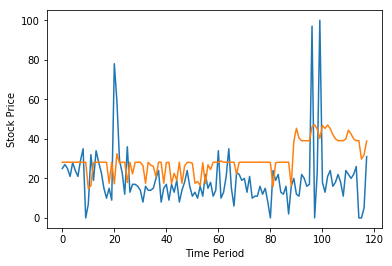

In [36]:
with tf.Session() as sess:
    #초기화
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()

In [37]:
test_predict=[item for sublist in test_predict for item in sublist]
testY=[item for sublist in testY for item in sublist]

In [38]:
rootMeanSquaredError(testY,test_predict)

18.743782777717964